## Win probability modeling

## EDA

In [1]:
import pandas as pd

df = pd.read_csv('play_by_play_2019-2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869804 entries, 0 to 869803
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  869804 non-null  int64  
 1   offense             869804 non-null  object 
 2   offense_conference  867279 non-null  object 
 3   defense             869804 non-null  object 
 4   defense_conference  867100 non-null  object 
 5   home                869804 non-null  object 
 6   away                869804 non-null  object 
 7   offense_score       869804 non-null  int64  
 8   defense_score       869804 non-null  int64  
 9   game_id             869804 non-null  int64  
 10  drive_id            869804 non-null  int64  
 11  drive_number        869804 non-null  int64  
 12  play_number         869804 non-null  int64  
 13  period              869804 non-null  int64  
 14  clock               869804 non-null  object 
 15  offense_timeouts    867807 non-nul

In [2]:
df['game_id'].nunique()

4966

In [3]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,869804.0,4.010826e+17,1.046829e+16,-5.700000e+02,4.012473e+17,4.014041e+17,4.015203e+17,4.015539e+17
offense_score,869804.0,1.349000e+01,1.270000e+01,-9.300000e+01,3.000000e+00,1.000000e+01,2.100000e+01,1.410000e+02
defense_score,869804.0,1.399000e+01,1.287000e+01,-6.300000e+01,3.000000e+00,1.000000e+01,2.100000e+01,1.410000e+02
game_id,869804.0,4.013557e+08,1.486928e+05,4.011107e+08,4.012473e+08,4.014041e+08,4.015203e+08,4.015539e+08
drive_id,869804.0,2.660722e+10,1.748596e+10,-8.200000e+01,4.014245e+09,4.012153e+10,4.014186e+10,4.015539e+10
drive_number,869804.0,1.274000e+01,7.480000e+00,1.000000e+00,6.000000e+00,1.200000e+01,1.900000e+01,4.900000e+01
play_number,869804.0,5.080000e+00,3.560000e+00,1.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,4.000000e+01
period,869804.0,2.500000e+00,1.110000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
offense_timeouts,867807.0,2.530000e+00,9.600000e-01,-1.200000e+01,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
defense_timeouts,867807.0,2.540000e+00,9.600000e-01,-1.100000e+01,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [4]:
df.head().T

,0,1,2,3,4
id,401110720101849902,401110720101855301,401110720101858401,401110720101866901,401110720101874201
offense,Duke,Alabama,Alabama,Alabama,Alabama
offense_conference,ACC,SEC,SEC,SEC,SEC
defense,Alabama,Duke,Duke,Duke,Duke
defense_conference,SEC,ACC,ACC,ACC,ACC
home,Alabama,Alabama,Alabama,Alabama,Alabama
away,Duke,Duke,Duke,Duke,Duke
offense_score,0,0,0,0,0
defense_score,0,0,0,0,0
game_id,401110720,401110720,401110720,401110720,401110720


In [5]:
df['clock'][0]

"{'minutes': 15, 'seconds': 0}"

In [6]:
df['clock_minutes'] = df['clock'].apply(lambda x: eval(x)['minutes'] + eval(x)['seconds']/60)
df['clock_minutes'].value_counts(bins=10)

(-0.059000000000000004, 5.8]    347281
(5.8, 11.6]                     293302
(11.6, 17.4]                    229182
(46.4, 52.2]                         9
(40.6, 46.4]                         8
(17.4, 23.2]                         7
(34.8, 40.6]                         5
(52.2, 58.0]                         4
(29.0, 34.8]                         3
(23.2, 29.0]                         3
Name: count, dtype: int64

In [7]:
len(df[df['clock_minutes'] > 15])

39

In [8]:
len(df[df['game_id'].isin(df[df['clock_minutes'] > 15]['game_id'])])

570

Fine with dropping the games where any clock_minutes value exceeds 15 minutes. 570 plays is very small compared to the dataset size

In [9]:
df = df[~df['game_id'].isin(df[df['clock_minutes'] > 15]['game_id'])]

## Feature definition

reducing to 
- `yards_to_goal`
- `down`
- `distance`
- `score_differential` -- we have `offense_score` - `defense_score` to keep this relative to the team in posession
- `time_remaining` -- account for the quarter in the `period` field and the `clock_minutes` -- i.e 15 left in Q1 is 60 mins remaining
    - probably best to remove overtime games altogether

- `pos_win` we need a binary outcome for whether the team in possession wins or loses. 
    - this needs to keep track of the home & away team. 

In [10]:
df['score_differential'] = df['offense_score'] - df['defense_score']

df = df.sort_values(['game_id', 'drive_number', 'play_number'])
df['final_score_diff'] = df.groupby('game_id')['score_differential'].transform('last')


df['pos_win'] = (
    (df['offense'] == df['home']) & 
    (df['final_score_diff'] > 0)) | (
    (df['offense'] == df['away']) & 
    (df['final_score_diff'] < 0)
    )

df['pos_win'] = df['pos_win'].astype(int)

df.tail().T

,816635,816636,816637,816638,816639
id,401553854104958209,401553854104996701,401553854104997701,401553854104999902,401553854104999903
offense,Montana State,Montana State,Northern Arizona,Montana State,Montana State
offense_conference,Big Sky,Big Sky,Big Sky,Big Sky,Big Sky
defense,Northern Arizona,Northern Arizona,Montana State,Northern Arizona,Northern Arizona
defense_conference,Big Sky,Big Sky,Big Sky,Big Sky,Big Sky
home,Montana State,Montana State,Montana State,Montana State,Montana State
away,Northern Arizona,Northern Arizona,Northern Arizona,Northern Arizona,Northern Arizona
offense_score,45,45,21,45,45
defense_score,14,14,45,21,21
game_id,401553854,401553854,401553854,401553854,401553854


<Axes: xlabel='time_remaining_minutes', ylabel='Count'>

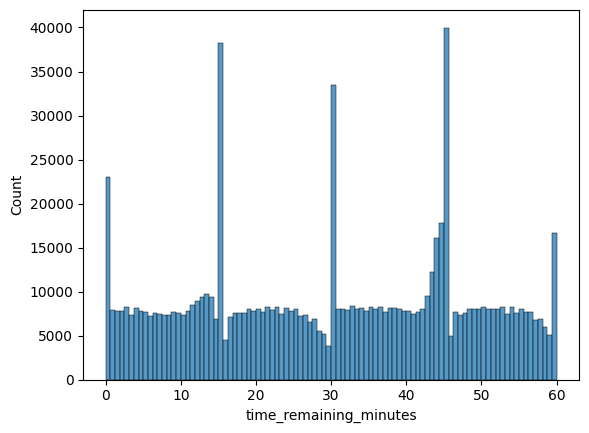

In [11]:
import seaborn as sns

# account for the fact that each quarter starts at 15
# Q1 needs to be 45 + (15 - clock_minutes)
# Q2 needs to be 30 + (15 - clock_minutes), etc
df['time_remaining_minutes'] = (4 - df['period']) * 15 + (15 - df['clock_minutes'])

#OT plays will show negative values here, let's make them 0
df.loc[df['time_remaining_minutes'] < 0, 'time_remaining_minutes'] = 0

sns.histplot(df['time_remaining_minutes'])

## Cleaning

### Removing non-plays

We can remove non-plays from the set -- such as penalties and timeouts. Luckily we have play types that categorize the play

In [12]:
df['play_type'].value_counts()

play_type
Rush                                  316379
Pass Reception                        165605
Pass Incompletion                     112107
Punt                                   45202
Penalty                                44444
Kickoff                                43384
Timeout                                30458
Sack                                   19121
Passing Touchdown                      16144
Rushing Touchdown                      15990
End Period                             10917
Field Goal Good                        10647
Kickoff Return (Offense)               10337
End of Half                             4547
Fumble Recovery (Own)                   3896
Interception                            3761
Pass Interception Return                3628
Field Goal Missed                       3388
Fumble Recovery (Opponent)              3360
End of Game                             3157
Interception Return Touchdown            772
Blocked Punt                             394


Confirming uncategorized, placeholder are real plays
- uncategorized are ok to keep, but placeholders include coin tosses, that can go away.

We can remove the following play types

- `End Period`
- `Penalty`
- `Timeout`
- `End Period`
- `End of Half`
- `End of Game`
- `End of Regulation`
- `placeholder`

In [13]:
non_plays = ['End Period','Penalty','Timeout','End Period','End of Half','End of Game','End of Regulation','placeholder']

df = df[~df['play_type'].isin(non_plays)]

In [14]:
df['play_type'].value_counts()

play_type
Rush                                  316379
Pass Reception                        165605
Pass Incompletion                     112107
Punt                                   45202
Kickoff                                43384
Sack                                   19121
Passing Touchdown                      16144
Rushing Touchdown                      15990
Field Goal Good                        10647
Kickoff Return (Offense)               10337
Fumble Recovery (Own)                   3896
Interception                            3761
Pass Interception Return                3628
Field Goal Missed                       3388
Fumble Recovery (Opponent)              3360
Interception Return Touchdown            772
Blocked Punt                             394
Blocked Field Goal                       368
Fumble Return Touchdown                  250
Safety                                   235
Kickoff Return Touchdown                 189
Uncategorized                             98


### Removing missing values

In [15]:
df.isna().sum()

id                             0
offense                        0
offense_conference          2236
defense                        0
defense_conference          2442
home                           0
away                           0
offense_score                  0
defense_score                  0
game_id                        0
drive_id                       0
drive_number                   0
play_number                    0
period                         0
clock                          0
offense_timeouts            1667
defense_timeouts            1667
yard_line                      0
yards_to_goal                  0
down                           0
distance                       0
scoring                        0
yards_gained                   0
play_type                      0
play_text                   1735
ppa                       116784
wallclock                   2347
clock_minutes                  0
score_differential             0
final_score_diff               0
pos_win   

- `ppa` has too many nulls to be useful
- given we have such a big size of data, it's not going to hurt to remove the missing values in `offense/defense timeouts`, `wallclock` or `offense/defense conference`
    - just have to remove every game where one of the values is null

In [16]:
game_nulls = df[(df['offense_conference'].isna()) |
                (df['defense_conference'].isna()) |
                (df['offense_timeouts'].isna()) |
                (df['defense_timeouts'].isna()) |
                (df['wallclock'].isna())
                ]['game_id'].unique()
len(game_nulls)

430

In [17]:
overtime_games = df[df['period'] > 4]['game_id'].unique()
(len(overtime_games) + len(game_nulls)) / df['game_id'].nunique()

0.12069312915575257

Still ending up with over 90% of extracted data, which is still quite a lot!

In [18]:
df = df[~df['game_id'].isin(game_nulls)]
df = df[~df['game_id'].isin(overtime_games)]

## Simple Model

In [19]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

feature_list = ['yards_to_goal','down','distance','score_differential','time_remaining_minutes']

def train_prediction_model(df, feature_list):
    #split on 20% of games for test data
    df = df.sort_values('game_id')
    unique_games = df['game_id'].unique()
    test_idx = int(len(unique_games) * 0.2)
    test_games = unique_games[-test_idx:]

    train = df[~df['game_id'].isin(test_games)]
    test = df[df['game_id'].isin(test_games)]

    X_train = sm.add_constant(train[feature_list])
    y_train = train['pos_win']

    X_test = sm.add_constant(test[feature_list])
    y_test = test['pos_win']

    model = sm.Logit(y_train, X_train)

    result = model.fit()

    # Evaluate the model on the test set
    y_pred = result.predict(X_test)
    y_pred_classes = np.where(y_pred >= 0.5, 1, 0)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    return result

simple_model = train_prediction_model(df, feature_list)

print(simple_model.summary())


Optimization terminated successfully.
         Current function value: 0.690937
         Iterations 3
Accuracy: 0.5376
Precision: 0.5388
Recall: 0.4286
F1-score: 0.4774
                           Logit Regression Results                           
Dep. Variable:                pos_win   No. Observations:               569590
Model:                          Logit   Df Residuals:                   569584
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.003139
Time:                        20:06:24   Log-Likelihood:            -3.9355e+05
converged:                       True   LL-Null:                   -3.9479e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const            

- 53 % accurate is a little bit better than a coin flip but not by much
- This pseudo R-squared value is very low -- indicating a poor overall fit
- coeficient magnitudes are also quite small, maybe these aren't the best features
- `distance` and `time_remaining_minutes` are not a significant predictor based on the p value but the others are.

## Feature engineering

In [20]:
df.columns

Index(['id', 'offense', 'offense_conference', 'defense', 'defense_conference',
       'home', 'away', 'offense_score', 'defense_score', 'game_id', 'drive_id',
       'drive_number', 'play_number', 'period', 'clock', 'offense_timeouts',
       'defense_timeouts', 'yard_line', 'yards_to_goal', 'down', 'distance',
       'scoring', 'yards_gained', 'play_type', 'play_text', 'ppa', 'wallclock',
       'clock_minutes', 'score_differential', 'final_score_diff', 'pos_win',
       'time_remaining_minutes'],
      dtype='object')

Some quick ideas:
- game stage -- binary whether we're in the 4th quarter or not
- ratio of score differential to time remaining
- timeout differential (offense timeouts - defense timeouts)
- ratio of down to yards to goal
- ratio of distance to yards to goal
- encoding different play types 
- wallclock time elapsed
- we can use scoring & yards gained as is

some trickier ideas
- something for team strength up to the game played in the current season
- something for conference strength up to the game played in the current season

In [21]:
df['game_stage'] = df['time_remaining_minutes'].apply(lambda x: 1 if x < 15 else 0)

In [22]:
#add 1 to prevent divide by 0 / infinity values
df['score_diff_time_remaining'] = df['score_differential'] / (df['time_remaining_minutes'] + 1)

df['down_yards_to_goal'] = df['down'] / (df['yards_to_goal'] + 1)
df['distance_yards_to_goal'] = df['distance'] / (df['yards_to_goal'] + 1)
df['timeout_differential'] = df['offense_timeouts'] - df['defense_timeouts']

In [23]:
# Let's try geting a one-hot encoding for passes, runs, and other plays
df['play_type'].value_counts()
rush_plays = ['Rush','Fumble']
pass_plays = ['Pass','Sack','Interception']

# do a regex search for each value in 
df['rush_play'] = df['play_type'].str.contains('|'.join(rush_plays)).astype(int)
df['pass_play'] = df['play_type'].str.contains('|'.join(pass_plays)).astype(int)
df['other_play'] = (df['rush_play'] + df['pass_play'] == 0).astype(int)

df['scoring'] = df['scoring'].astype(int)


In [24]:
#for each game id -- get the time elapsed by taking the wallclock time for each play and subtracting the wallclock time of the first play
df['wallclock'] = pd.to_datetime(df['wallclock'])
df['time_elapsed'] = df.groupby('game_id')['wallclock'].transform(lambda x: (x - x.min()).dt.total_seconds() / 60)

### Generating values for team, conference strength

What we need here is a rolling average that takes into account recent performance from each team.

We can make a similar motion for conference strength

<Axes: xlabel='conf_rolling_yards_gained', ylabel='Count'>

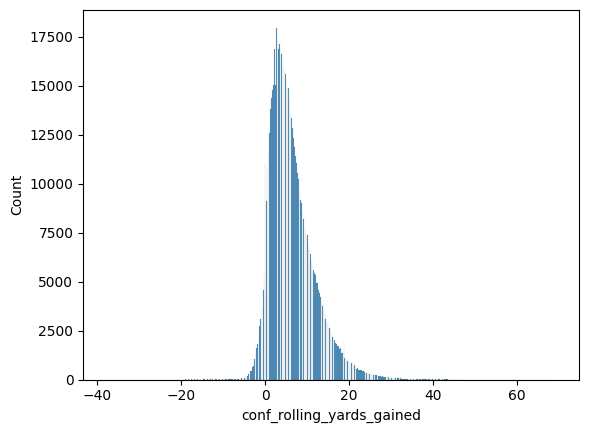

In [25]:
# get the dataset in order of team, and game ID -- then take rolling average from previous four games

df = df.sort_values(['offense','game_id'])

N = 4
df['team_rolling_yards_gained'] = df.groupby('offense')['yards_gained'].rolling(window=N).mean().reset_index(0, drop=True)
df['team_rolling_score_diff'] = df.groupby('offense')['score_differential'].rolling(window=N).mean().reset_index(0, drop=True)

df = df.sort_values(['offense_conference','game_id'])

df['conf_rolling_yards_gained'] = df.groupby('offense_conference')['yards_gained'].rolling(window=N).mean().reset_index(0, drop=True)
df['conf_rolling_score_diff'] = df.groupby('offense_conference')['score_differential'].rolling(window=N).mean().reset_index(0, drop=True)


for col in ['team_rolling_yards_gained','team_rolling_score_diff','conf_rolling_yards_gained','conf_rolling_score_diff']:
    df[col] = df[col].fillna(0)

sns.histplot(df['conf_rolling_yards_gained'])

## Feature Selection & Scaling

We've gotta clear out potential multicolinearity -- if two features correlate too strongly with eachother, that can throw the model off.

In [26]:
corr_matrix = df.select_dtypes('number').corr().abs()
#only need the upper traingle of the matrix -- as the correlations go both ways

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_mask = corr_matrix.where(corr_matrix > 0.8, np.nan).mask(mask, other=np.nan)

non_nan_indices = np.where(~np.isnan(high_corr_mask))
row_col_pairs = zip(non_nan_indices[0], non_nan_indices[1])
high_corr_cols = [[corr_matrix.columns[row], corr_matrix.columns[col]]
                  for row, col in row_col_pairs]

print("Highly correlated pairs of columns (correlation > 0.8):")
for pair in high_corr_cols:
    print(pair)

Highly correlated pairs of columns (correlation > 0.8):
['drive_number', 'drive_id']
['period', 'drive_number']
['time_remaining_minutes', 'drive_number']
['time_remaining_minutes', 'period']
['team_rolling_score_diff', 'score_differential']
['conf_rolling_yards_gained', 'team_rolling_yards_gained']
['conf_rolling_score_diff', 'score_differential']
['conf_rolling_score_diff', 'team_rolling_score_diff']


In [27]:
df['pos_win'].value_counts()

pos_win
0    356372
1    349707
Name: count, dtype: int64

In [28]:
df.select_dtypes('number').columns

Index(['id', 'offense_score', 'defense_score', 'game_id', 'drive_id',
       'drive_number', 'play_number', 'period', 'offense_timeouts',
       'defense_timeouts', 'yard_line', 'yards_to_goal', 'down', 'distance',
       'scoring', 'yards_gained', 'ppa', 'clock_minutes', 'score_differential',
       'final_score_diff', 'pos_win', 'time_remaining_minutes', 'game_stage',
       'score_diff_time_remaining', 'down_yards_to_goal',
       'distance_yards_to_goal', 'timeout_differential', 'rush_play',
       'pass_play', 'other_play', 'time_elapsed', 'team_rolling_yards_gained',
       'team_rolling_score_diff', 'conf_rolling_yards_gained',
       'conf_rolling_score_diff'],
      dtype='object')

In [29]:
#get the rank correlation coefficient for the pos_win column
spearman_corr = df.select_dtypes('number').corr(method='spearman')['pos_win'].abs().sort_values(ascending=False)

print(spearman_corr)


pos_win                      1.000000
score_differential           0.073397
score_diff_time_remaining    0.073157
conf_rolling_score_diff      0.072439
team_rolling_score_diff      0.071872
yard_line                    0.044896
offense_score                0.040986
defense_score                0.035331
timeout_differential         0.029801
final_score_diff             0.023514
offense_timeouts             0.014451
defense_timeouts             0.011759
rush_play                    0.011560
team_rolling_yards_gained    0.011028
pass_play                    0.010475
conf_rolling_yards_gained    0.010118
yards_to_goal                0.009757
ppa                          0.009068
down                         0.008313
yards_gained                 0.006856
clock_minutes                0.006800
game_id                      0.005172
id                           0.005165
scoring                      0.004687
distance_yards_to_goal       0.004283
distance                     0.004157
drive_id    

- `score_differential` over the rolling averages
- `team_rolling_yards` over conference -- didn't expect those two to be so close.

## Final model evaluation

In [30]:
import xgboost as xgb


feature_list = ['game_stage', 'yards_to_goal','down','distance','score_differential','time_remaining_minutes',
                'score_diff_time_remaining','down_yards_to_goal','distance_yards_to_goal',
                'timeout_differential','rush_play','pass_play','scoring','time_elapsed',
                'team_rolling_yards_gained']

def train_xgb(df, feature_list):
    df = df.sort_values('game_id')
    unique_games = df['game_id'].unique()
    test_idx = int(len(unique_games) * 0.2)
    test_games = unique_games[-test_idx:]

    train = df[~df['game_id'].isin(test_games)]
    test = df[df['game_id'].isin(test_games)]

    X_train = train[feature_list]
    y_train = train['pos_win']

    X_test = test[feature_list]
    y_test = test['pos_win']

    xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    return xgb_model

xgb_model = train_xgb(df, feature_list)


Accuracy: 0.5491
Precision: 0.5491
Recall: 0.4757
F1-score: 0.5098


In [31]:
df = df.sort_values('game_id')
unique_games = df['game_id'].unique()
test_idx = int(len(unique_games) * 0.2)
test_games = unique_games[-test_idx:]
X_test = df[df['game_id'].isin(test_games)][feature_list]

df[(df['offense'] == 'Oklahoma') & (df['defense'] == 'Texas')].tail().T

,729960,729922,729923,729924,729925
id,401525861104907901,401525861103927801,401525861103935901,401525861103938001,401525861103938901
offense,Oklahoma,Oklahoma,Oklahoma,Oklahoma,Oklahoma
offense_conference,Big 12,Big 12,Big 12,Big 12,Big 12
defense,Texas,Texas,Texas,Texas,Texas
defense_conference,Big 12,Big 12,Big 12,Big 12,Big 12
home,Texas,Texas,Texas,Texas,Texas
away,Oklahoma,Oklahoma,Oklahoma,Oklahoma,Oklahoma
offense_score,27,27,27,27,27
defense_score,20,17,17,17,17
game_id,401525861,401525861,401525861,401525861,401525861


In [32]:
401525861 in test_games

True

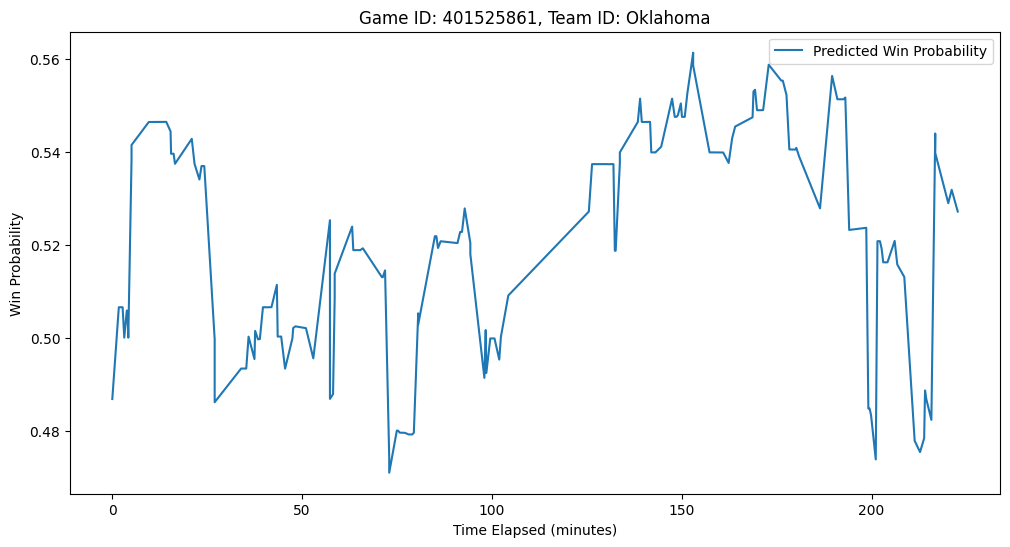

In [33]:
import matplotlib.pyplot as plt

def visualize_win_probability(df, feature_list, xgb_model, game_id, team_id):
    game_data = df[(df['game_id'] == game_id)]
    game_data = game_data.sort_values('time_elapsed')
    
    X = game_data[feature_list]
    y_pred = xgb_model.predict_proba(X)[:, 1]
    
    # take inverse predictions when the team is on defense
    game_data['on_offense'] = game_data['offense'] == team_id
    y_pred = np.where(game_data['on_offense'], y_pred, 1 - y_pred)
    
    plt.figure(figsize=(12, 6))
    plt.plot(game_data['time_elapsed'], y_pred, label='Predicted Win Probability')
    plt.xlabel('Time Elapsed (minutes)')
    plt.ylabel('Win Probability')
    plt.title(f'Game ID: {game_id}, Team ID: {team_id}')
    plt.legend()
    plt.show()

game_id = 401525861
team_id = 'Oklahoma'
visualize_win_probability(df, feature_list, xgb_model, game_id, team_id)
